# Introduction to Data Science - Homework 3
*COMP 5369 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 2, 11:59pm.

In this homework you will read in and analyze a movies dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 

## Your Data
Fill out the following information: 

*First Name:*   Aniket
*Last Name:*   Patil
*E-mail:*   aniket.patil@utah.edu
*UID:* u1144414


## Part 1: Analyzing Data The Hard Way

In this part we'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

Parse the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and/or Homework 2 might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "ratings" and the "votes" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, a row of the table, and the number of rows and columns.

In [1]:
# import the csv library
import csv

# initialize the top-level array
movie = []
with open('movies.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in filereader:
        movie.append(row)
        
header = movie.pop(0)
print(header)
print(movie[0])
print(len(movie),len(movie[1]))


['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']
['1', '$', '1971', '121', 'NA', '6.4', '348', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '1', '1', '0', '0', '0']
58788 25


### Task 1.2:  Calculate movie stats

In this task, you will calculate some statistics about movies. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell - you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for the movies and print the output. Also print the number of movies.
Your output could look like this:
    
    Average rating: xxx.xxxx, Number of movies: xx

#### Task 1.2.2: Calculate average rating for major movies

Compute the average rating for the movies that have more than 500 votes in your loaded dataset and print the output. (We'll call these movies with more than 500 votes *major movies* from now on).

Your output could look like this:
    
    Average rating of movies with more than 500 votes: xxx.xxxx, Number of major movies: xx

#### Task 1.2.3: Find the highest rated major movie

Find out which of the movies with more than 500 votes has the highest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: MOVIE TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the size relationship of major movies to all movies?
 * Are major movies usually better than the average movies?

In [2]:
# your code goes here
def mean_list(l):
    mean=0
    count=0
    for i in l:
        mean+=i
        count+=1
    return round(mean/count,4)
movie_mean=[]
major_mean=[]
major_movies=[]
for x in movie:
    movie_mean.append(float(x[5]))
    if float(x[6])>500:
        major_movies.append(x[1])
        major_mean.append(float(x[5]))


print("Averagen rating:",mean_list(movie_mean),'Number of movies:', len(movie_mean))
print("Average rating of movies with more than 500 votes:" ,mean_list(major_mean), "Number of major movies:", len(major_mean))
print("Highest rating:",max(major_mean),'Title:',major_movies[major_mean.index(max(major_mean))])


Averagen rating: 5.9329 Number of movies: 58788
Average rating of movies with more than 500 votes: 6.3706 Number of major movies: 6458
Highest rating: 9.1 Title: Godfather, The


**Your Interpretation**: TODO

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [3]:
# import pansas and numpy
import pandas as pd
import numpy as np
# your code goes here
movies=pd.read_csv('movies.csv')
movies.head()


,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [4]:
# print data types
print(movies.dtypes)

Unnamed: 0       int64
title           object
year             int64
length           int64
budget         float64
rating         float64
votes            int64
r1             float64
r2             float64
r3             float64
r4             float64
r5             float64
r6             float64
r7             float64
r8             float64
r9             float64
r10            float64
mpaa            object
Action           int64
Animation        int64
Comedy           int64
Drama            int64
Documentary      int64
Romance          int64
Short            int64
dtype: object


**Your Interpretation**: TODO

### Task 2.2: Calculate the average rating

Compute the average rating for all movies and print the output in a formatted way.

Your output could look like this:
    
    Average rating: xxx.xxxx

In [5]:
# your code goes here
print(movies['rating'].mean())

5.932850241545932


### Task 2.3: Compare the runtime

Measure the runtime of the mean calculation using [Pandas](http://pandas.pydata.org/pandas-docs/stable) and compare it to the computation time for calculating the mean using a for loop (you can copy the relevant parts from part one).

You can use [time.clock()](https://docs.python.org/3/library/time.html) to set timestamps before and after the execution of the code you want to measure, then you simply substract end time from start time.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
    time using own code: xxx.xxx s  
    time using Pandas: xxx.xxx s  
    difference factor: xxx

In [6]:
import time
# your code goes here
mean_list(movie_mean)
x=time.clock()
print('time using own code:',x,'s')
movies['rating'].mean()
y=time.clock()
print('time using Pandas:',y,'s')
print('difference factor',y-x)

time using own code: 8.553083429341695e-07 s
time using Pandas: 0.002468419877708013 s
difference factor 0.0024675645693650787


### Task 2.4: Filter out rows

The whole movies dataset has about 60k entries. Use pandas to filter your dataframe to contain only the major movies with more than 500 votes.

Count and print the number of movies with more than 500 votes. 

E.g.:
    xxx.xxx movies have more than 500 votes.

In [15]:
# your code goes here
maj_mov=movies[movies['votes']>500]
maj_mov.shape[0]

#fltr=maj_mov['title']
#fltr.shape


6458

### Task 2.5: Calculate the average rating for major movies

Compute the average rating for the major movies.
Your output could look like this:
    
    Average rating of movies with more than 500 votes: xxx.xxxx

In [8]:
# your code goes here
avg=maj_mov['rating']
avg.mean()

6.370579126664578

### Task 2.6: Find the highest rated major movie

Find the highest rated major movie in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) could be a helpful function. 

Print the title and the rating.

Your output could look like this:
    
    Highest rated movie: TITLE, rating: x.x


In [9]:
# your code goes here
m=movies.iloc[avg.idxmax()]
print('Highest rated movie:',m['title'],', rating:',m['rating'])


Highest rated movie: Godfather, The , rating: 9.1


### Task 2.7: Filter out rows and count specific features

From the major movies you filtered out in a previous task, find out 
 * How many are comedies.
 * How many are dramas
 * How many are both, comedies and dramas
 
Create new dataframed for each of these subsets.

Hint: you can combine broadcasting statements with a boolean AND: `&`.

Print the results, e.g.:  

    xxx.xxx major movies are comedies.
    xxx.xxx major movies are dramas.
    xxx.xxx major movies are both, comedies and dramas.

In [22]:
# your code goes here

drama=maj_mov[maj_mov['Drama']==1]
com_n_drama=maj_mov[(maj_mov['Comedy']==1) &( maj_mov['Drama']==1)]
com=maj_mov[maj_mov['Comedy']==1 ]

print(com.shape[0],'major movies are comedies.')
print(drama.shape[0],'major movies are dramas.')
print(com_n_drama.shape[0],'major movies are both, comeides and dramas.')

2553 major movies are comedies.
3370 major movies are dramas.
814 major movies are both, comeides and dramas.


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for comedies and dramas for major movies.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [26]:
# your code goes here
com_ratings=com['rating']
drama_ratings=drama['rating']
com_ratings.describe()
drama_ratings.describe()




count    3370.000000
mean        6.749614
std         0.990969
min         1.300000
25%         6.200000
50%         6.900000
75%         7.500000
max         9.100000
Name: rating, dtype: float64

**Your Interpretation**: TODO

### Task 2.9: Movies per year

Calcluate how many major movies were made in each year.

Print the number like this, sorted by year:

    year   number of movies
    1902    xxx
    1903    xxx
    ...     ...

Use this data to render a line chart of the number of movies per year.

In [100]:
# your code goes here
plt_line=(maj_mov['year'].value_counts()).sort_index()

s={'year':'number of movies' }
plt_line('1903')




TypeError: 'Series' object is not callable

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# create the plot here
plt_line.plot()

### Task 2.10: Yearly average

Compute the average rating per year for all major movies.  
Use the numbers you computed to plot a line chart. Plot the year on the x-axis and the average rating on th y axis.  

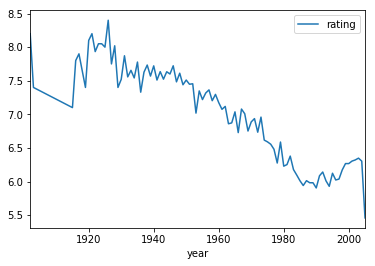

In [73]:
# your code goes here
%matplotlib inline
a=maj_mov[['year','rating']]
b=a.groupby('year').mean()
b.plot()



### Task 2.11: Explore and Interpret

Are old movies better? How could you explain this? Are there differences between the rating of major movies and all movies over time? Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of votes per year, the average number of votes for a movie in a particular year, etc. 

**TODO: your code and your interpretation**